# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls -l

total 8
drwx------ 5 root root 4096 Apr  2 17:31 drive/
drwxr-xr-x 1 root root 4096 Mar 30 13:53 sample_data/


In [3]:
data=pd.read_csv('/content/drive/MyDrive/7409ML/all_kindle_review .csv')

In [4]:
data.info

<bound method DataFrame.info of        Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0                 0       11539  B0033UV8HI  [8, 10]       3   
1                 1        5957  B002HJV4DE   [1, 1]       5   
2                 2        9146  B002ZG96I4   [0, 0]       3   
3                 3        7038  B002QHWOEU   [1, 3]       3   
4                 4        1776  B001A06VJ8   [0, 1]       4   
...             ...         ...         ...      ...     ...   
11995         11995        2183  B001DUGORO   [0, 0]       4   
11996         11996        6272  B002JCSFSQ   [2, 2]       5   
11997         11997       12483  B0035N1V7K   [0, 1]       3   
11998         11998        3640  B001W1XT40   [1, 2]       1   
11999         11999       11398  B003370JUS   [5, 6]       3   

                                              reviewText   reviewTime  \
0      Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1      Great short read.  I didn't want to put it dow

# Preprocessing Data

In [5]:
#preprocessing the data
data  = data[['reviewText','rating']]
from sklearn.utils import shuffle  
# data = data.sample(frac=1)
data.info

<bound method DataFrame.info of                                               reviewText  rating
0      Jace Rankin may be short, but he's nothing to ...       3
1      Great short read.  I didn't want to put it dow...       5
2      I'll start by saying this is the first of four...       3
3      Aggie is Angela Lansbury who carries pocketboo...       3
4      I did not expect this type of book to be in li...       4
...                                                  ...     ...
11995  Valentine cupid is a vampire- Jena and Ian ano...       4
11996  I have read all seven books in this series. Ap...       5
11997  This book really just wasn't my cuppa.  The si...       3
11998  tried to use it to charge my kindle, it didn't...       1
11999  Taking Instruction is a look into the often hi...       3

[12000 rows x 2 columns]>

In [6]:
data.isnull().sum()

reviewText    0
rating        0
dtype: int64

In [7]:
data.rating=data.rating.replace([1,2,3],0)
data.rating=data.rating.replace([4,5],1)

<ipython-input-7-57ceaf8a6536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rating=data.rating.replace([1,2,3],0)
<ipython-input-7-57ceaf8a6536>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rating=data.rating.replace([4,5],1)


In [8]:
data.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",0
1,Great short read. I didn't want to put it dow...,1
2,I'll start by saying this is the first of four...,0
3,Aggie is Angela Lansbury who carries pocketboo...,0
4,I did not expect this type of book to be in li...,1


# Cleaning Dataset

In [9]:
#preprocessing the data
from spacy.lang.en.stop_words import STOP_WORDS
import re

def preprocess(text_column):
    text_column = text_column.str.lower() #lowercase
    text_column = text_column.str.replace(r'[^a-zA-Z\s]', '', regex=True) #remove punctuations
    text_column = text_column.str.replace(r'\s+', ' ', regex=True) #remove extra spaces
    #remove stopwords
    text_column = text_column.apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))
    #remove extra spaces
    text_column = text_column.apply(lambda x: " ".join(x.split()))
    #remove emails
    text_column= text_column.apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))
    
    return text_column

In [10]:
data["reviewText"] = preprocess(data["reviewText"])

<ipython-input-10-cdc9b7c912b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reviewText"] = preprocess(data["reviewText"])


In [11]:
data["reviewText"]

0        jace rankin short hes mess man hauled saloon u...
1        great short read didnt want read sitting sex s...
2        ill start saying books wasnt expecting conclud...
3        aggie angela lansbury carries pocketbooks inst...
4        expect type book library pleased find price right
                               ...                        
11995    valentine cupid vampire jena ian vampire finds...
11996    read seven books series apocalypticadventure f...
11997    book wasnt cuppa situation man capturing woman...
11998    tried use charge kindle didnt register chargin...
11999    taking instruction look hidden world sexual bd...
Name: reviewText, Length: 12000, dtype: object

In [12]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["reviewText"] = data["reviewText"].apply(lambda text: lemmatize_words(text))

<ipython-input-13-f0879f9648b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reviewText"] = data["reviewText"].apply(lambda text: lemmatize_words(text))


In [14]:
data["reviewText"]

0        jace rankin short he mess man hauled saloon un...
1        great short read didnt want read sitting sex s...
2        ill start saying book wasnt expecting conclude...
3        aggie angela lansbury carry pocketbook instead...
4        expect type book library pleased find price right
                               ...                        
11995    valentine cupid vampire jena ian vampire find ...
11996    read seven book series apocalypticadventure fa...
11997    book wasnt cuppa situation man capturing woman...
11998    tried use charge kindle didnt register chargin...
11999    taking instruction look hidden world sexual bd...
Name: reviewText, Length: 12000, dtype: object

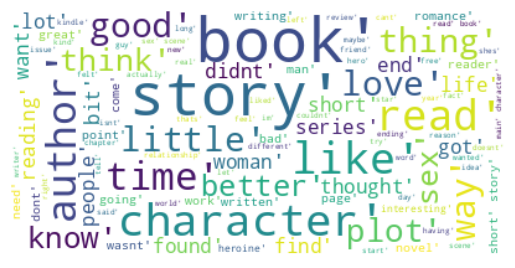

In [15]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image 
import nltk
import matplotlib.pyplot as plt 
#word tokenize the data
def word_tokenize(text):
    #make all text to string
    rating = " ".join(text)
    tokens = nltk.word_tokenize(rating)
    return str(tokens)

#set up wordcloud
def wordcloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


wordcloud(word_tokenize(data['reviewText'][data['rating'] == 0]))

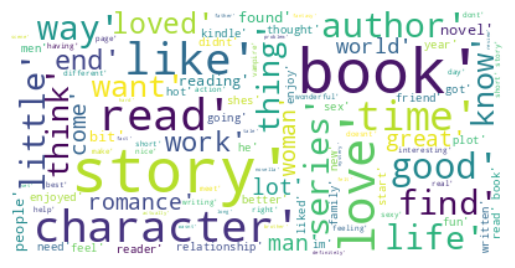

In [16]:
wordcloud(word_tokenize(data['reviewText'][data['rating'] == 1]))

# Tokenization and Splitting The Dataset

In [17]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding


In [18]:
reviews_list = []
for i in range(len(data['reviewText'])):
  reviews_list.append(data['reviewText'][i])
 
sentiment = data['rating']


In [19]:
y = np.array(sentiment)

In [20]:
X_train, X_test,Y_train, Y_test = train_test_split(reviews_list, y, test_size=0.2, random_state = 45)

In [21]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index

In [22]:
def read_glove_vector(glove_vec):
    f = open(glove_vec,'r', errors = 'ignore', encoding='utf8')
    word_to_vec_map = {}
    for line in f:
        w_line = line.split(' ')
        curr_word = w_line[0]
        word_to_vec_map[curr_word] = np.array(w_line[1:],dtype=np.float64)
    return word_to_vec_map

In [23]:
word_to_vec_map = read_glove_vector('/content/drive/MyDrive/7409ML/glove.840B.300d.txt')



In [24]:
maxLen = 128

# Embedding The Matrix and Setting up the model

In [25]:
vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    try:
        emb_matrix[index, :] = embedding_vector
    except:
        continue

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)


In [49]:
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Model
from tensorflow.keras.regularizers import l2

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers.legacy import Adam
from keras.models import Model
from keras.layers import concatenate,Flatten
from tensorflow.keras.optimizers.legacy import SGD

adam = Adam(learning_rate = 1e-4)

In [28]:
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')
X_test_indices = tokenizer.texts_to_sequences(X_test)
X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')


In [54]:
def conv1d_model(input_shape):
  X_indices = Input(input_shape)
  embeddings = embedding_layer(X_indices)
  X = Conv1D(512,3,activation='relu',kernel_regularizer = l2(0.01))(embeddings)
  X = MaxPooling1D(3)(X)
  # X = Conv1D(256,5,activation='relu')(X)
  # X = MaxPooling1D(3)(X)
  # X = Conv1D(256,5,activation='relu')(X)
  # X = Dropout(0.5)(X)
  # X = MaxPooling1D(3)(X)
  X = GlobalMaxPooling1D()(X)
  X = Dense(128, activation='relu')(X)
  X = Dropout(0.8)(X)
  X = Dense(1, activation='sigmoid')(X)
  model = Model(inputs=X_indices, outputs=X)
  return model

In [33]:
# def conv1d_model(input_shape):
#   X_indices = Input(input_shape)
#   embeddings = embedding_layer(X_indices)
#   X = Conv1D(256,3,activation='relu')(embeddings)
#   X = MaxPooling1D(3)(X)
#   X = Conv1D(256,3,activation='relu')(X)
#   X = MaxPooling1D(3)(X)
#   X = Conv1D(256,3,activation='relu')(X)
#   X = Dropout(0.8)(X)
#   X = MaxPooling1D(3)(X)
#   X = GlobalMaxPooling1D()(X)
#   X = Dense(256, activation='relu')(X)
#   X = Dense(1, activation='sigmoid')(X)
#   model = Model(inputs=X_indices, outputs=X)
#   return model


In [43]:

# def conv1d_model(input_shape, num_filters=256, filter_sizes=(2, 3, 4)):
#     # Input layer
#     X_indices = Input(input_shape)

#     # Embedding layer
#     embeddings = embedding_layer(X_indices)

#     # Convolution and pooling layers for each filter size
#     pooled_outputs = []
#     for filter_size in filter_sizes:
#         conv = Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu',kernel_regularizer = l2(0.01))(embeddings)
#         pool = MaxPooling1D(pool_size=(input_shape[0] - filter_size + 1))(conv)
#         pooled_outputs.append(pool)

#     # Concatenate the pooled outputs
#     cnn = concatenate(pooled_outputs, axis=-1)

#     # Flatten and add dropout layer
#     flat = Flatten()(cnn)
#     drop = Dropout(rate=0.5)(flat)

#     # Output layer
#     output = Dense(units=1, activation='sigmoid')(drop)

#     # Create the model
#     model = Model(inputs=X_indices, outputs=output)
#     return model

In [61]:
model_1d = conv1d_model((maxLen,))
model_1d.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 300)          10672800  
                                                                 
 conv1d_14 (Conv1D)          (None, 126, 512)          461312    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 42, 512)          0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 512)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 128)               6566

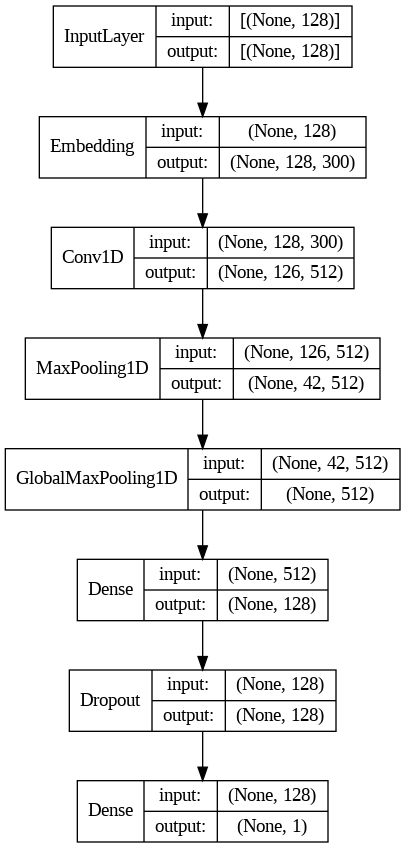

In [56]:
from keras.utils import plot_model
plot_model(model_1d,show_shapes=True,show_layer_names=False)

In [62]:
model_1d.compile(optimizer=adam,loss='binary_crossentropy', metrics=['accuracy'])

model_1d.fit(X_train_indices, Y_train, 
             batch_size=64, epochs=30,
             validation_split=0.25,
             callbacks=[
             tf.keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=5,
                restore_best_weights=True
            )
            ]
           )

Epoch 1/30
113/113 [==============================] - 45s 385ms/step - loss: 2.8445 - accuracy: 0.6529 - val_loss: 1.7640 - val_accuracy: 0.7825
Epoch 2/30
113/113 [==============================] - 49s 433ms/step - loss: 1.4050 - accuracy: 0.7626 - val_loss: 1.1050 - val_accuracy: 0.7983
Epoch 3/30
113/113 [==============================] - 44s 388ms/step - loss: 0.9764 - accuracy: 0.7867 - val_loss: 0.8468 - val_accuracy: 0.8021
Epoch 4/30
113/113 [==============================] - 44s 386ms/step - loss: 0.7801 - accuracy: 0.8068 - val_loss: 0.7255 - val_accuracy: 0.7946
Epoch 5/30
113/113 [==============================] - 44s 387ms/step - loss: 0.6723 - accuracy: 0.8292 - val_loss: 0.6497 - val_accuracy: 0.8054
Epoch 6/30
113/113 [==============================] - 44s 394ms/step - loss: 0.5981 - accuracy: 0.8375 - val_loss: 0.6121 - val_accuracy: 0.8075
Epoch 7/30
113/113 [==============================] - 43s 381ms/step - loss: 0.5488 - accuracy: 0.8496 - val_loss: 0.5763 - val_ac

In [63]:
model_1d.evaluate(X_test_indices, Y_test)

75/75 [==============================] - 11s 148ms/step - loss: 0.5228 - accuracy: 0.8129


[0.5227599143981934, 0.8129166960716248]

In [64]:
y_pred = model_1d.predict(X_test_indices)
y = np.where(y_pred>0.5,1.,0.)
y_true = Y_test

75/75 [==============================] - 8s 96ms/step


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,y)

array([[966, 237],
       [212, 985]])

In [ ]:
model_1d.save_weights('model_1d_weights.hdf5')

In [ ]:
count = np.count_nonzero(y==[0.])
count,y.shape

(1315, (2400, 1))